In [1]:
import pandas as pd
cnyfilm_com = pd.read_excel('/Users/yangmi/Documents/WeiboHotListDataSet/comments/2023春节档已官宣五部电影/2023春节档已官宣五部电影_cmtMmzbNoJsa.xlsx')

In [2]:
cnyfilm_com

,评论id,发布时间,用户id,用户昵称,用户城市,点赞数,回复数,评论内容
0,4853785270164076,Tue Jan 03 11:20:50 +0800 2023,2364148433,在希望的田野上偷菜,海外 丹麦,1520,1,图片评论
1,4853786755477039,Tue Jan 03 11:26:44 +0800 2023,1844014613,北城耶啵_,其他,1407,0,准备好了
2,4853786713261544,Tue Jan 03 11:26:34 +0800 2023,1844014613,北城耶啵_,其他,1168,1,大年初一看无名
3,4853785342253294,Tue Jan 03 11:21:07 +0800 2023,5322590909,萱草花_85,其他,1050,0,大年初一看《无名》
4,4853785262297883,Tue Jan 03 11:20:48 +0800 2023,7729870215,逃跑新娘yb,其他,871,0,大年初一看无名耶
...,...,...,...,...,...,...,...,...
488,4854270492676389,Wed Jan 04 19:28:56 +0800 2023,7566448554,Lucky-Uhdndmfm,其他,0,0,噗…吹
489,4854239249832029,Wed Jan 04 17:24:47 +0800 2023,7344758594,低调的我1171,海外,1,0,啊啊啊啊啊春节看无名[报税]
490,4854208941263228,Wed Jan 04 15:24:21 +0800 2023,7750710086,iu1七,其他,0,0,准备好了，大年初一，不见不散
491,4854205397338608,Wed Jan 04 15:10:16 +0800 2023,6998523346,李白爱吃螺蛳粉,河南 商丘,0,0,发面馒头


In [3]:
import jieba
import re

In [4]:
#对微博内容进行清洗，去除标点符号、特殊字符、表情等,去除停用词、分词
def clean_text(text):
    text = re.sub(r'[^\u4e00-\u9fa5]+', '', text)
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[^\w\s]','',text)
    text = re.sub('\s+',' ',text)
    return text

In [5]:
cnyfilm_com["评论内容"] = cnyfilm_com["评论内容"].apply(clean_text)

In [6]:
#读取停顿词列表
stopword_zh = [k.strip() for k in open('stopwords.txt', encoding='utf8').readlines() if k.strip() != '']

In [7]:
def preprocess_text(text):
    words = jieba.cut(text)
    words = [word for word in words if word not in stopword_zh]
    return words

In [9]:
cnyfilm_com["评论内容"] = cnyfilm_com["评论内容"].apply(preprocess_text)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/87/6c4tjldn0b9bqgff58m4gx540000gn/T/jieba.cache
Loading model cost 0.316 seconds.
Prefix dict has been built successfully.


In [10]:
text = cnyfilm_com["评论内容"].map(' '.join)
text

0             图片 评论
1                 好
2           大年初一 无名
3           大年初一 无名
4         大年初一 无名 耶
           ...     
488             噗 吹
489    啊啊啊 春节 无名 报税
490     好 大年初一 不见不散
491           发面 馒头
492             太棒了
Name: 评论内容, Length: 493, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

#初始化CountVectorizer
vectorizer = CountVectorizer()

#将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

In [12]:
list(X.toarray())

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [14]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

379

In [15]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('无名', 344),
 ('大年初一', 156),
 ('王一博', 83),
 ('期待', 64),
 ('电影', 54),
 ('春节', 23),
 ('不见不散', 21),
 ('五部', 19),
 ('大卖', 19),
 ('官宣', 19),
 ('一博王', 16),
 ('谍战', 16),
 ('定档', 15),
 ('悬疑', 13),
 ('梁朝伟', 12),
 ('喜欢', 11),
 ('一博', 9),
 ('程耳', 9),
 ('叶秘', 8),
 ('大片', 8),
 ('导演', 8),
 ('影院', 8),
 ('电影院', 8),
 ('阵容', 8),
 ('大麦', 7),
 ('巨制', 7),
 ('王一博王', 7),
 ('一个', 6),
 ('主演', 6),
 ('初一', 6),
 ('别人', 6),
 ('博爱', 6),
 ('快乐', 6),
 ('神秘', 6),
 ('哈哈哈', 5),
 ('喜乐', 5),
 ('平安', 5),
 ('影帝', 5),
 ('微博', 5),
 ('我要', 5),
 ('票房', 5),
 ('转发', 5),
 ('一张', 4),
 ('三部曲', 4),
 ('不染', 4),
 ('仙客', 4),
 ('似山眼', 4),
 ('信心', 4),
 ('倾力', 4),
 ('凡裳', 4),
 ('可爱', 4),
 ('吃饭', 4),
 ('啊啊啊', 4),
 ('图片', 4),
 ('坐近', 4),
 ('多时', 4),
 ('好看', 4),
 ('必看', 4),
 ('打造', 4),
 ('拥星', 4),
 ('期盼', 4),
 ('比心', 4),
 ('烟火', 4),
 ('王一博喜', 4),
 ('皮囊', 4),
 ('眉秀', 4),
 ('看谍', 4),
 ('笑笑', 4),
 ('纸屑', 4),
 ('行程', 4),
 ('评论', 4),
 ('超强', 4),
 ('遇见', 4),
 ('风尘', 4),
 ('食尽', 4),
 ('鬼才', 4),
 ('世上', 3),
 ('世界', 3),
 ('好好', 3),
 ('守护', 3),
 ('影后'

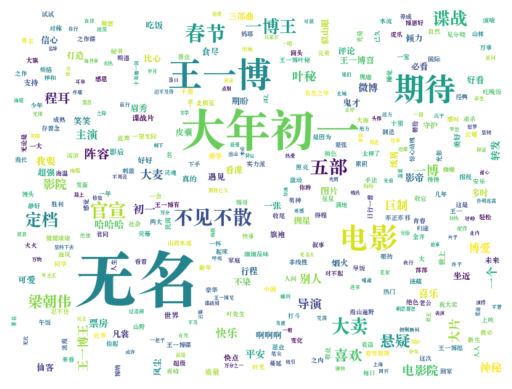

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='Songti.ttc',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=800,
    height=600,
    max_words=370,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()